# Introducción a la limpieza de datos o Data Cleaning

<br>
<img src="./images/limpieza.jpg" height = "500" width = "500">
<br>
<br>

Es una técnica que transforma los datos sin procesar en un formato comprensible. Los datos del mundo real (datos sin procesar) siempre están incompletos y esos datos no se pueden enviar a través de modelos, ya que causarían ciertos errores. Es por eso que necesitamos preprocesar los datos antes de enviarlos a través de un modelo, pero antes de ello veremos algunas funciones que serán útiles para el procesado de datos básico.

La limpieza de datos o `Data Cleaning` abarca un sin número de posbilidades para limpiar la data, ya que esta depende de las características del propio dataset, en el cual podremos encontrar diferentes maneras de limpiar dicha data, que al final estarán ligadas inclusive a las metodologías propias del programador, entre ellas podremos encontrar las siguientes maneras de hacerlo:

- Renombrar columnas (pd.rename)
- Casteo correcto de los datos (astype)
- Aplicar funciones a diferentes columnas (apply, agg)
- Eliminar variables irrelevantes o que no aportan información al dataset (drop)
- Identificar valores nulos (isnull, isna)
- Eliminar o tratar valores nulos (dropna)
- Estandarizar variables numéricas
- Estandarizar variables categóricas


# Concat

El método concat nos permite unir tablas mediante filas o columnas, esto se especifíca mediante el parametro axis.

- Axis = 0 ---> por por filas
- Axis = 1 ---> por por columnas

```Python
import pandas as pd

pd.concat([dataframe_1, datafrme_2, ...], axis = 0) # por filas
pd.concat([dataframe_1, datafrme_2, ...], axis = 1) # por columnas


```

<img src = "./images/concat.png" height = "1000" width = "1000">

In [32]:
from pandas import read_excel, concat, DataFrame

In [35]:
df_enero = read_excel("./datasets/Tasa_de_Cambio_Representativa_del_Mercado-_TRM.xlsx", sheet_name = "Enero")
df_febrero = read_excel("./datasets/Tasa_de_Cambio_Representativa_del_Mercado-_TRM.xlsx", sheet_name = "Febrero")
df_enero["MES"] = "enero"
df_febrero["MES"] = "febrero"

In [36]:
df_final = concat([df_enero, df_febrero], axis = 0, ignore_index = True)
df_final["VALOR"] = df_final["VALOR"].apply(lambda x: x.replace(",", ""))
df_final["VALOR"] = df_final["VALOR"].astype(float)
df_final.head(3)

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA,MES
0,3258.84,COP,2020-01-03,2020-01-03,enero
1,3262.05,COP,2020-01-04,2020-01-07,enero
2,3264.26,COP,2020-01-08,2020-01-08,enero


# Groupby

El `groupby` en python permite agrupar datos a los cuales se les aplicará una determinada función o cálculo como vemos a continuación:

<img src="./images/groupby.png" height = "900" width = "900">

In [28]:
df_final.groupby(["MES"])["VALOR"].sum()

MES
enero      63066.87
febrero    68326.38
Name: VALOR, dtype: float64

In [29]:
df_final.groupby(["MES"])[["VALOR"]].sum()

,VALOR
MES,
enero,63066.87
febrero,68326.38


In [34]:
valor_1 = df_final[df_final["MES"] == "enero"]["VALOR"].sum()
valor_2 = df_final[df_final["MES"] == "febrero"]["VALOR"].sum()
DataFrame({
    "Valor": [valor_1, valor_2]
}, index = ["enero", "febrero"])

,Valor
enero,63066.87
febrero,68326.38


In [58]:
df_enero = read_excel("./datasets/Tasa_de_Cambio_Representativa_del_Mercado-_TRM.xlsx", sheet_name = "Enero")
df_febrero = read_excel("./datasets/Tasa_de_Cambio_Representativa_del_Mercado-_TRM.xlsx", sheet_name = "Febrero")
df_marzo = read_excel("./datasets/Tasa_de_Cambio_Representativa_del_Mercado-_TRM.xlsx", sheet_name = "Marzo")
df_abril = read_excel("./datasets/Tasa_de_Cambio_Representativa_del_Mercado-_TRM.xlsx", sheet_name = "Abril")

df_enero["MES_NUM"], df_enero["MES"] = 1, "enero"
df_febrero["MES_NUM"], df_febrero["MES"] = 2, "febrero"
df_marzo["MES_NUM"], df_marzo["MES"] = 3, "marzo"
df_abril["MES_NUM"], df_abril["MES"] = 4, "abril"

df_final = concat([df_enero, df_febrero, df_marzo, df_abril], axis = 0, ignore_index = True)
df_final["VALOR"] = df_final["VALOR"].apply(lambda x: x.replace(",", ""))
df_final["VALOR"] = df_final["VALOR"].astype(float)
df_final.sort_values(by = ["MES"], inplace = True)
df_final.head()

,VALOR,UNIDAD,VIGENCIADESDE,VIGENCIAHASTA,MES_NUM,MES
78,3983.29,COP,2020-04-30,2020-04-30,4,abril
60,4081.06,COP,2020-04-02,2020-04-02,4,abril
61,4065.50,COP,2020-04-03,2020-04-03,4,abril
62,4008.78,COP,2020-04-04,2020-04-06,4,abril
63,3978.38,COP,2020-04-07,2020-04-07,4,abril


In [65]:
df_final.groupby(["MES_NUM", "MES", "UNIDAD"])[["VALOR"]].sum()

VALOR
MES_NUM MES     UNIDAD          
1       enero   COP     63066.87
2       febrero COP     68326.38
3       marzo   US      77730.30
4       abril   COP     48401.19
                US      31330.03

In [62]:
df_group = df_final.groupby(["MES_NUM", "MES", "UNIDAD"])[["VALOR"]].sum().reset_index()

In [63]:
df_group[df_group["MES"] == "abril"]

,MES_NUM,MES,UNIDAD,VALOR
3,4,abril,COP,48401.19
4,4,abril,US,31330.03


## Aggregation

Los métodos de agregación son útilies cuando se quiere aplicar varios cálculos al mismo tiempo, normalmente son bastante utilizados cuando se realiza un groupby

In [71]:
df_final.agg({"VALOR": [np.mean]})

,VALOR
mean,3656.389494


In [72]:
df_final.agg({"VALOR": ["mean"]})

,VALOR
mean,3656.389494


In [80]:
df_final.agg({"VALOR": ["mean", "median", max, min, np.std]})

,VALOR
mean,3656.389494
median,3507.110000
max,4153.910000
min,3253.890000
std,318.320074


## Aggregation con groupby

Las funciones de agregación se pueden combinar con el groupby de la siguiente forma

In [81]:
df_final.groupby(["MES_NUM", "MES", "UNIDAD"])[["VALOR"]].sum().mean()

VALOR    57770.954
dtype: float64

In [84]:
df_agg = df_final.groupby(["MES_NUM", "MES", "UNIDAD"]).agg({"VALOR": [sum, "median", np.std]})
df_agg

VALOR                      
                             sum    median         std
MES_NUM MES     UNIDAD                                
1       enero   COP     63066.87  3313.400   54.866271
2       febrero COP     68326.38  3405.925   43.967290
3       marzo   US      77730.30  4015.245  248.400391
4       abril   COP     48401.19  4039.850   30.817426
                US      31330.03  3915.490   43.089853

In [86]:
df_agg["VALOR"]

sum    median         std
MES_NUM MES     UNIDAD                                
1       enero   COP     63066.87  3313.400   54.866271
2       febrero COP     68326.38  3405.925   43.967290
3       marzo   US      77730.30  4015.245  248.400391
4       abril   COP     48401.19  4039.850   30.817426
                US      31330.03  3915.490   43.089853

In [87]:
df_final.columns

Index(['VALOR', 'UNIDAD', 'VIGENCIADESDE', 'VIGENCIAHASTA', 'MES_NUM', 'MES'], dtype='object')

In [88]:
df_agg.columns

MultiIndex([('VALOR',    'sum'),
            ('VALOR', 'median'),
            ('VALOR',    'std')],
           )

In [99]:
df_agg[[("VALOR", "sum")]]

VALOR
                             sum
MES_NUM MES     UNIDAD          
1       enero   COP     63066.87
2       febrero COP     68326.38
3       marzo   US      77730.30
4       abril   COP     48401.19
                US      31330.03

In [101]:
df_agg_new = df_agg.droplevel(0, axis = "columns")
df_agg_new[["sum"]]

sum
MES_NUM MES     UNIDAD          
1       enero   COP     63066.87
2       febrero COP     68326.38
3       marzo   US      77730.30
4       abril   COP     48401.19
                US      31330.03

# Valores nulos

Uno de los problemas más habituales con el que podemos encontrarnos a la hora de trabajar con un conjunto de datos es la existencia de registros con valores nulos. Pudiendo ser necesario imputar un valor a estos registros para poder usarlos en un posterior análisis.

Existen muchas formas de hacerlo, a continuación veremos algunos método básicos

In [55]:
from pandas import read_csv, DataFrame

In [51]:
df = read_csv("./datasets/ERC_Data.csv", na_values = "?")
df.head()

,id,Ind_ERC,Ind_Ant_Fam_DM,Ind_Ant_Fam_Enf_Cardio,Ind_Ant_Fam_ERC,Dias_DM,Dias_HTA,Ind_Ant_Per_Anemia,Ind_Ant_Per_AR,Ind_Ant_Per_Dislip,...,Valor_HbA1c,Valor_IMC,Valor_PAD,Valor_PAS,Valor_PCR,Valor_TFG,Valor_Trigliceridos,Edad,Raza_Desc,Sexo_Cd
0,123391,Si,No,No,Si,0,3709,No,No,Si,...,NaN,19.909972,70.0,110.0,NaN,51.625386,62.0,68,MESTIZO,M
1,44515,No,No,No,No,0,0,No,No,No,...,NaN,31.833910,60.0,100.0,NaN,NaN,171.2,49,SIN INFORMACION DESDE LA FUENTE,M
2,225004,Si,No,No,No,0,1420,No,No,No,...,NaN,23.108435,80.0,140.0,NaN,NaN,56.0,96,BLANCO,M
3,393421,No,No,No,No,0,3776,No,Si,No,...,5.44,27.303438,80.0,120.0,0.05,133.804060,112.0,93,BLANCO,F
4,103672,No,No,No,No,0,0,No,No,No,...,NaN,22.632591,60.0,100.0,NaN,NaN,NaN,57,SIN INFORMACION DESDE LA FUENTE,F


In [49]:
def convert_string_na(item):
    if item == "?":
        return None
    else:
        return item
        
lista_columnas = df.columns.tolist()

for col in lista_columnas:
    
    df[col] = df[col].apply(convert_string_na)

## Isnull() e Isna()

In [53]:
df.shape

(262331, 47)

In [52]:
df.isnull().sum()

id                                0
Ind_ERC                           0
Ind_Ant_Fam_DM                    0
Ind_Ant_Fam_Enf_Cardio            0
Ind_Ant_Fam_ERC                   0
Dias_DM                           0
Dias_HTA                          0
Ind_Ant_Per_Anemia                0
Ind_Ant_Per_AR                    0
Ind_Ant_Per_Dislip                0
Ind_Ant_Per_DM                    0
Ind_Ant_Per_Enf_Cardio            0
Ind_Ant_Per_Enf_Cerebro           0
Ind_Ant_Per_EVP                   0
Ind_Ant_Per_Gestante              0
Ind_Ant_Per_Hiperuri              0
Ind_Ant_Per_HTA                   0
Ind_Ant_Per_Lit_Renal             0
Ind_Ant_Per_Lupus                 0
Ind_Ant_Per_HPB                   0
Ind_Medic_AINES                   0
Ind_Medic_HTA                     0
Ind_Mayoria_Cigarrillo       163498
Ind_Frecuencia_Cigarrillo    163498
Ind_Cercania_Cigarrillo      163498
Ind_Mayoria_Ejercicio        202872
Ind_Frecuencia_Ejercicio     202872
Ind_Cercania_Ejercicio      

In [61]:
df_null = DataFrame(df.isna().sum()).rename(columns = {0: "count_null"})
df_null["porcentaje_nulos"] = (df_null["count_null"]/df.shape[0])*100
df_null["porcentaje_nulos"] = df_null["porcentaje_nulos"].apply(lambda x: round(x, 2))
df_null

,count_null,porcentaje_nulos
id,0,0.00
Ind_ERC,0,0.00
Ind_Ant_Fam_DM,0,0.00
Ind_Ant_Fam_Enf_Cardio,0,0.00
Ind_Ant_Fam_ERC,0,0.00
Dias_DM,0,0.00
Dias_HTA,0,0.00
Ind_Ant_Per_Anemia,0,0.00
Ind_Ant_Per_AR,0,0.00
Ind_Ant_Per_Dislip,0,0.00


## Reemplzar valores nulos con fillna()

Una de las formas mas efectivas de eliminar datos nulos es reemplazandolos por un calculo matemático o por el comportamiento de los datos

- Especificar el valor exacto
- Especificar un calculo estadistico
- Utilizar bfill o ffill

<img src="./images/fillna.png" height = "580" width = "580">

In [65]:
df = read_csv("./datasets/ERC_Data.csv", na_values = "?")
df.tail()

,id,Ind_ERC,Ind_Ant_Fam_DM,Ind_Ant_Fam_Enf_Cardio,Ind_Ant_Fam_ERC,Dias_DM,Dias_HTA,Ind_Ant_Per_Anemia,Ind_Ant_Per_AR,Ind_Ant_Per_Dislip,...,Valor_HbA1c,Valor_IMC,Valor_PAD,Valor_PAS,Valor_PCR,Valor_TFG,Valor_Trigliceridos,Edad,Raza_Desc,Sexo_Cd
262326,229328,No,No,No,No,3978,2515,No,No,No,...,9.08,29.731095,60.0,115.0,NaN,71.337760,245.0,73,MESTIZO,M
262327,57893,Si,No,Si,No,0,2053,Si,No,No,...,NaN,30.666667,70.0,120.0,0.36,47.552197,123.0,92,MESTIZO,F
262328,128184,No,No,No,No,0,0,No,No,No,...,NaN,26.446281,80.0,100.0,NaN,NaN,NaN,32,MESTIZO,F
262329,142336,No,No,No,No,0,0,No,No,Si,...,NaN,20.202020,70.0,120.0,NaN,125.305846,56.0,70,BLANCO,F
262330,46759,No,No,No,No,0,0,No,No,No,...,NaN,20.004572,70.0,110.0,NaN,NaN,NaN,64,SIN INFORMACION DESDE LA FUENTE,M


In [63]:
df["Valor_TFG"].dtype

dtype('float64')

In [66]:
df["Valor_TFG"].fillna(method = "bfill").fillna(0)

0          51.625386
1         133.804060
2         133.804060
3         133.804060
4         100.461360
             ...    
262326     71.337760
262327     47.552197
262328    125.305846
262329    125.305846
262330      0.000000
Name: Valor_TFG, Length: 262331, dtype: float64

In [73]:
import numpy as np
media = np.mean(df["Valor_TFG"])
df["Valor_TFG"].fillna(media)

0          51.625386
1          96.117641
2          96.117641
3         133.804060
4          96.117641
             ...    
262326     71.337760
262327     47.552197
262328     96.117641
262329    125.305846
262330     96.117641
Name: Valor_TFG, Length: 262331, dtype: float64

In [74]:
import seaborn as sns

C:\Users\usuario1\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Valor_TFG', ylabel='Density'>

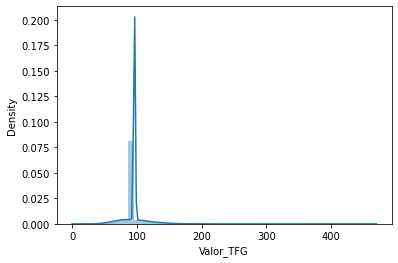

In [89]:
sns.distplot(df["Valor_TFG"].fillna(media))

In [87]:
x = df["Valor_TFG"].fillna(media)
x.std()/x.mean()

0.16416921424160835

## Eliminar filas con datos nulos

Una de las formas en las que podemos eliminar datos nulos es eliminando directamente todos las filas que contengan datos nulos

<img src="./images/dropna.png" height = "580" width = "580">

In [94]:
df.shape

(262331, 47)

In [93]:
df.dropna(how = "all")

,id,Ind_ERC,Ind_Ant_Fam_DM,Ind_Ant_Fam_Enf_Cardio,Ind_Ant_Fam_ERC,Dias_DM,Dias_HTA,Ind_Ant_Per_Anemia,Ind_Ant_Per_AR,Ind_Ant_Per_Dislip,...,Valor_HbA1c,Valor_IMC,Valor_PAD,Valor_PAS,Valor_PCR,Valor_TFG,Valor_Trigliceridos,Edad,Raza_Desc,Sexo_Cd
0,123391,Si,No,No,Si,0,3709,No,No,Si,...,NaN,19.909972,70.0,110.0,NaN,51.625386,62.0,68,MESTIZO,M
1,44515,No,No,No,No,0,0,No,No,No,...,NaN,31.833910,60.0,100.0,NaN,NaN,171.2,49,SIN INFORMACION DESDE LA FUENTE,M
2,225004,Si,No,No,No,0,1420,No,No,No,...,NaN,23.108435,80.0,140.0,NaN,NaN,56.0,96,BLANCO,M
3,393421,No,No,No,No,0,3776,No,Si,No,...,5.44,27.303438,80.0,120.0,0.05,133.804060,112.0,93,BLANCO,F
4,103672,No,No,No,No,0,0,No,No,No,...,NaN,22.632591,60.0,100.0,NaN,NaN,NaN,57,SIN INFORMACION DESDE LA FUENTE,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262326,229328,No,No,No,No,3978,2515,No,No,No,...,9.08,29.731095,60.0,115.0,NaN,71.337760,245.0,73,MESTIZO,M
262327,57893,Si,No,Si,No,0,2053,Si,No,No,...,NaN,30.666667,70.0,120.0,0.36,47.552197,123.0,92,MESTIZO,F
262328,128184,No,No,No,No,0,0,No,No,No,...,NaN,26.446281,80.0,100.0,NaN,NaN,NaN,32,MESTIZO,F
262329,142336,No,No,No,No,0,0,No,No,Si,...,NaN,20.202020,70.0,120.0,NaN,125.305846,56.0,70,BLANCO,F


## Método Replace

In [109]:
import scipy.stats as st

In [118]:
df_test = DataFrame({
    "Nombre": ["David", "Luisa", "Juan", "Carlos", "Laura", "Maira", "Jimena"],
    "sexo": ["M", "F", None, "M", "F", None, "F"],
    "ciudad": [1,1,2,3,3,1]
})

def convert_sex(item):
    
    if item[-1] == "a":
        return "F"
    else:
        return "M"

display(df_test)

moda = st.mode(df_test["sexo"].dropna())[0][0]
df_test["sexo"] = df_test["sexo"].fillna(moda)

display(df_test)

df_test["sexo"] = df_test["Nombre"].apply(lambda x: convert_sex(x))

display(df_test)

,Nombre,sexo
0,David,M
1,Luisa,F
2,Juan,None
3,Carlos,M
4,Laura,F
5,Maira,None
6,Jimena,F


,Nombre,sexo
0,David,M
1,Luisa,F
2,Juan,F
3,Carlos,M
4,Laura,F
5,Maira,F
6,Jimena,F


,Nombre,sexo
0,David,M
1,Luisa,F
2,Juan,M
3,Carlos,M
4,Laura,F
5,Maira,F
6,Jimena,F


In [145]:
df_test = DataFrame({
    "Nombre": ["David", "Luisa", "Juan", "Carlos", "Laura", "Maira", "Jimena"],
    "id_sexo": [1, 2, None, 1, 2, 3, 2],
    "id_ciudad": [1,1,2,3,3,1,2]
})

df_test

,Nombre,id_sexo,id_ciudad
0,David,1.0,1
1,Luisa,2.0,1
2,Juan,NaN,2
3,Carlos,1.0,3
4,Laura,2.0,3
5,Maira,3.0,1
6,Jimena,2.0,2


In [124]:
df_ciudades = DataFrame({
    "id_ciudad": [1,2,3],
    "ciudad": ["Medellin", "Cali", "Bogota"]
})

df_ciudades

,id_ciudad,ciudad
0,1,Medellin
1,2,Cali
2,3,Bogota


In [140]:
df_sexo = DataFrame({
    "id_sexo": [1,2,3],
    "sexo": ["M", "F", "Otros"]
})

df_sexo

,id_sexo,sexo
0,1,M
1,2,F
2,3,Otros


In [122]:
from pandas import merge

In [143]:
df_test = merge(df_test, df_ciudades, on = ["id_ciudad"], how = "inner")
df_test

,Nombre,id_sexo,id_ciudad,ciudad
0,David,1,1,Medellin
1,Luisa,2,1,Medellin
2,Maira,3,1,Medellin
3,Juan,3,2,Cali
4,Jimena,2,2,Cali
5,Carlos,1,3,Bogota
6,Laura,2,3,Bogota


In [147]:
df_test = merge(df_test, df_sexo, on = ["id_sexo"], how = "inner")
df_test

,Nombre,id_sexo,id_ciudad,sexo_x,sexo_y
0,David,1.0,1,M,M
1,Carlos,1.0,3,M,M
2,Luisa,2.0,1,F,F
3,Laura,2.0,3,F,F
4,Jimena,2.0,2,F,F
5,Maira,3.0,1,Otros,Otros
